In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import PIL

np.random.seed(0)

In [5]:
from PIL import Image

directory_benign_train = "C:/Users/Chhavi Bhadana/Downloads/dataset new (1)/dataset new/train/benign"
directory_malignant_train = "C:/Users/Chhavi Bhadana/Downloads/dataset new (1)/dataset new/train/malignant"
directory_benign_test = "C:/Users/Chhavi Bhadana/Downloads/dataset new (1)/dataset new/test/benign"
directory_malignant_test = "C:/Users/Chhavi Bhadana/Downloads/dataset new (1)/dataset new/test/malignant"

read = lambda imname: np.asarray(Image.open(imname).convert('RGB'))

img_benign_train = [read(os.path.join(directory_benign_train, filename)) for filename in os.listdir(directory_benign_train)]
img_malignant_train = [read(os.path.join(directory_malignant_train, filename)) for filename in os.listdir(directory_malignant_train)]

# Loading test images
img_benign_test = [read(os.path.join(directory_benign_test, filename)) for filename in os.listdir(directory_benign_test)]
img_malignant_test = [read(os.path.join(directory_malignant_test, filename)) for filename in os.listdir(directory_malignant_test)]

#img_benign_train
type(img_benign_train)


list

In [8]:
X_benign_train = np.array(img_benign_train, dtype='uint8')
X_malignant_train = np.array(img_malignant_train, dtype='uint8')

X_benign_test = np.array(img_benign_test, dtype='uint8')
X_malignant_test = np.array(img_malignant_test, dtype='uint8')

type(X_benign_train)

numpy.ndarray

In [9]:
## Creating labels: benign is 0 and malignant is 1

y_benign_train = np.zeros(X_benign_train.shape[0])
y_malignant_train = np.ones(X_malignant_train.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])

y_malignant_train

array([1., 1., 1., ..., 1., 1., 1.])

In [10]:
X_train = np.concatenate((X_benign_train, X_malignant_train), axis=0) 
y_train = np.concatenate((y_benign_train, y_malignant_train), axis=0)

X_test = np.concatenate((X_benign_test, X_malignant_test), axis=0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis=0)

In [11]:
print("Shape of X_train: ", X_train.shape)

Shape of X_train:  (3841, 224, 224, 3)


In [12]:
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

y_test

Shape of y_train:  (3841,)
Shape of X_test:  (360, 224, 224, 3)
Shape of y_test:  (360,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [13]:
#shuffling data
s1 = np.arange(X_train.shape[0])
np.random.shuffle(s1)
X_train = X_train[s1]
y_train = y_train[s1]

s2 = np.arange(X_test.shape[0])
np.random.shuffle(s2)
X_test = X_test[s2]
y_test = y_test[s2]

In [14]:
print("Shuffle orders example: ", s1)

Shuffle orders example:  [1358 1708 3568 ... 1653 2607 2732]


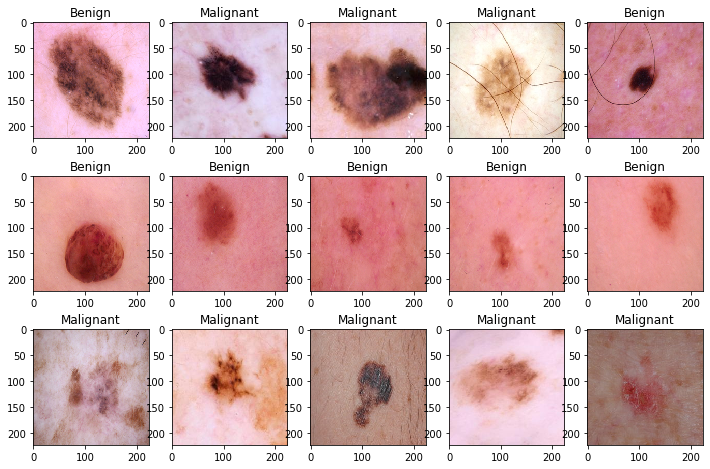

In [15]:
fig = plt.figure(figsize=(12,8))
columns = 5
rows = 3

for i in range(1, columns*rows+1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

In [16]:
import keras
from keras.utils.np_utils import to_categorical 

y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

type(y_train)

numpy.ndarray

In [17]:
y_train

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

Normalization

In [19]:
X_train = X_train/255
X_test = X_test/255


adding 64 filters, each filter has a size of 3*3
    # padding is of 2 types: SAME and VALID (SAME means doing the padding around the image, VALID means no padding)
    # kernel initilizer is for intializing the weights of the network --> the default one is glorot_uniform so don't need to mention parameter

In [20]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam, RMSprop


In [21]:

def build_cnn_model(input_shape = (224, 224, 3), num_classes = 2):
    model = Sequential()

    model.add(Conv2D(64, kernel_size=(3,3), padding= 'Same', input_shape= input_shape, activation= 'relu', kernel_initializer= 'glorot_uniform'))
    model.add(MaxPool2D(pool_size=(2,2)))
    #25% of the model will be dropped 
    model.add(Dropout(0.25))

    model.add(Conv2D(64, kernel_size=(3,3), padding= 'Same', activation= 'relu', kernel_initializer= 'glorot_uniform'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(128, activation='relu', kernel_initializer='normal'))
    model.add(Dense(128, activation='relu', kernel_initializer='normal'))
    
    model.add(Dense(num_classes, activation = 'softmax'))
    
    model.summary()

    optimizer= Adam(lr=0.001) 

    model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=["accuracy"])
    
    return model

In [22]:
model_cnn = build_cnn_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 64)        0

C:\Users\Chhavi Bhadana\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [23]:
from keras.callbacks import ReduceLROnPlateau

# Learning rate annealer is used to reduce the learning rate by some percentage after certain number of training iterations/epochs
learning_rate_annealer = ReduceLROnPlateau(monitor='val_acc',
                                          patience=5,
                                          verbose=1,
                                          factor=0.5,
                                          min_lr = 1e-7)

# epochs is the number of iterations
# batch_size is the number of images in one epoch
# verbose = 1 shows us the animation of the epoch using progres_bar
history = model_cnn.fit(X_train, 
                    y_train, 
                    validation_split=0.2, 
                    epochs=50, 
                    batch_size = 64, 
                    verbose=1,
                    callbacks=[learning_rate_annealer])


# list all data in history
print(history.history.keys())

Epoch 1/50
48/48 [==============================] - 401s 7s/step - loss: 0.9560 - accuracy: 0.6468 - val_loss: 0.6086 - val_accuracy: 0.7100 - lr: 0.0010
Epoch 2/50
48/48 [==============================] - 349s 7s/step - loss: 0.5152 - accuracy: 0.7627 - val_loss: 0.6003 - val_accuracy: 0.6502 - lr: 0.0010
Epoch 3/50
48/48 [==============================] - 317s 7s/step - loss: 0.4594 - accuracy: 0.7891 - val_loss: 0.4430 - val_accuracy: 0.7906 - lr: 0.0010
Epoch 4/50
48/48 [==============================] - 297s 6s/step - loss: 0.4367 - accuracy: 0.7988 - val_loss: 0.4712 - val_accuracy: 0.7672 - lr: 0.0010
Epoch 5/50
48/48 [==============================] - 273s 6s/step - loss: 0.3799 - accuracy: 0.8285 - val_loss: 0.4138 - val_accuracy: 0.8088 - lr: 0.0010
Epoch 6/50
48/48 [==============================] - 285s 6s/step - loss: 0.3575 - accuracy: 0.8366 - val_loss: 0.5000 - val_accuracy: 0.7750 - lr: 0.0010
Epoch 7/50
48/48 [==============================] - 280s 6s/step - loss: 0.3

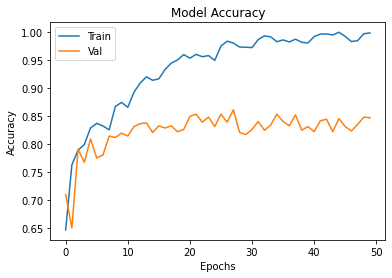

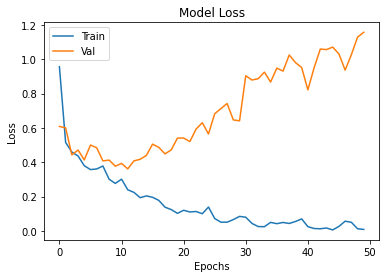

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# 2. Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Testing the model

In [26]:
from sklearn.metrics import accuracy_score

# Testing model on test data to evaluate
y_pred = np.argmax(model_cnn.predict(X_test), axis=-1)

print(accuracy_score(np.argmax(y_test, axis=1),y_pred))

0.9416666666666667


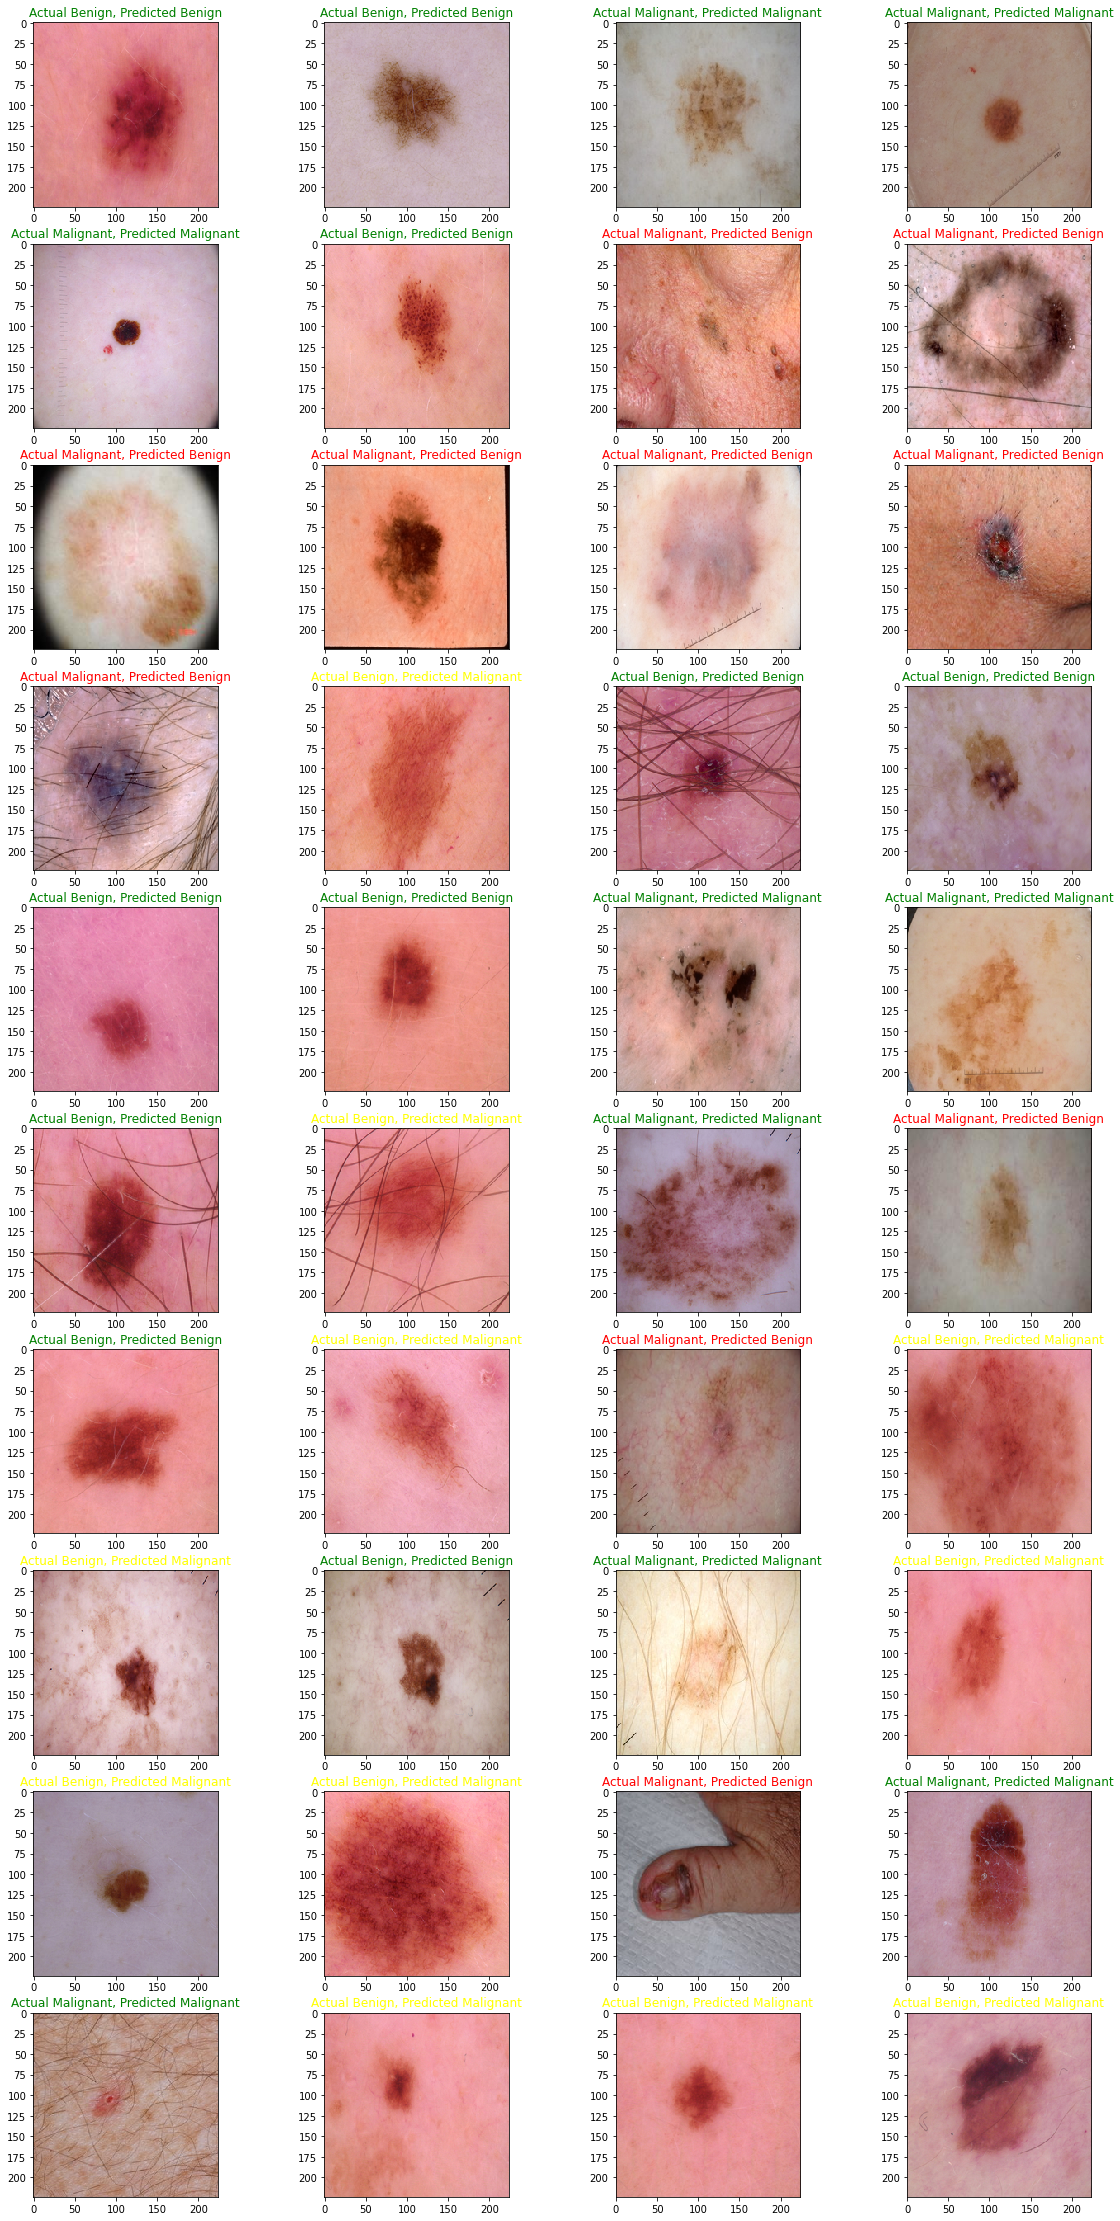

In [27]:
X_test = np.concatenate((X_benign_test, X_malignant_test), axis=0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis=0)

# shuffling data
s2 = np.arange(X_test.shape[0])
np.random.shuffle(s2)
X_test = X_test[s2]
y_test = y_test[s2]
y_pred = y_pred[s2]

# plotting
fig = plt.figure(figsize=(20,40))
columns = 4
rows = 10

for i in range(1, columns*rows+1):
    ax = fig.add_subplot(rows, columns, i)
    if y_test[i] == 0:
        if y_pred[i] == 0:
            ax.set_title('Actual Benign, Predicted Benign', color='green')
        else:
            ax.set_title('Actual Benign, Predicted Malignant', color='yellow')
    else:
        if y_pred[i] == 1:
            ax.set_title('Actual Malignant, Predicted Malignant', color='green')
        else:
            ax.set_title('Actual Malignant, Predicted Benign', color='red')
    
        
    plt.imshow(X_test[i], interpolation='nearest')
plt.show()